# Problem Definition

Create predictive model to estimate credit card default.

# Data Discription

customerID - Client unique identification - character <br>
sex - Sex (Female, Male) - factor <br>
status - Marital Status (Divorced,Married,Single,Unknown,Widower) - factor <br>
age -  in years - numeric <br>
externalScore - A score provided by third party about the risk of default - numeric <br>
indSimin - A binary variable that indicates if the client has guarantors - binary <br>
indXlist-A binary variable that indicates if the client has debts with official agencies published in public<br>
indCreditBureau - A binary variable that indicates if the client appears in the delinquency list Credit Bureau <br>
indInternet - A binary variable that indicates if the client ask for information about credit cards online - binary<br>
indBadDebt -  A binary variable that indicates whether the actual debt is classified as sub-standard or lower-quality risk<br>
salary - Salary in intervals (None , <650 , [650,1000) , [1000,1300) , [1300,1500) , [1500,2000) , [2000,3000) , [3000,5000), [5000,8000) , >8000 , Unknown) - factor <br>
numLoans - Number of active loans that the client has in the bank - numeric <br>
numMortgages - Number of active mortgages that the client has in the bank - numeric <br>
channel - Channel for which the credit card has been contracted (App, Branch,Call Center, External Agent,Online, Recovery, Unknown) - factor <br>
indBadLocation - A binary varible indicanting if the client's adress is located in a low rent per capita zone <br>
previous - client debt classification of the previous year (Default, Normal, Refinancing, Restructuring, Unpaid) - factor <br>
sumExternalDefault - The amount of money that the client's debs that are in default - numeric <br>
target - A binary variable that indicates that the credit card fee has been unpaid - binary <br>

# Importing Libraries

In [1]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']


In [99]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, IterativeSVD, MICE
%matplotlib inline 

# Importing Datasets

In [4]:
train_data = pd.read_csv("challengeTrain.csv")
test = pd.read_csv("challengeTest.csv")

## Check Datasets

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522939 entries, 0 to 522938
Data columns (total 18 columns):
customerID            522939 non-null object
sex                   522939 non-null object
status                522939 non-null object
age                   500238 non-null float64
externalScore         514626 non-null float64
indSimin              522939 non-null int64
indXlist              522939 non-null int64
indCreditBureau       522939 non-null int64
indInternet           522939 non-null int64
indBadDebt            522939 non-null int64
salary                522939 non-null object
numLoans              267338 non-null float64
numMortgages          267338 non-null float64
channel               522939 non-null object
indBadLocation        522939 non-null int64
previous              522939 non-null object
sumExternalDefault    520260 non-null float64
target                522939 non-null int64
dtypes: float64(5), int64(7), object(6)
memory usage: 71.8+ MB


In [6]:
train_data.shape

(522939, 18)

In [8]:
train_data.head()

,customerID,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,numLoans,numMortgages,channel,indBadLocation,previous,sumExternalDefault,target
0,D_00046780637,Female,Single,23.0,373.0,0,0,0,1,1,"[1000,1300)",NaN,NaN,External Agent,0,Normal,1173.46,1
1,D_00043828980,Male,Single,27.0,702.0,1,0,0,1,0,"[1500,2000)",1.0,0.0,External Agent,0,Restructuring,0.00,0
2,D_00043396577,Male,Single,28.0,728.0,0,0,0,1,0,"[1500,2000)",2.0,0.0,External Agent,0,Restructuring,0.00,1
3,D_00006768677,Male,Single,45.0,650.0,0,0,0,0,0,"[1000,1300)",1.0,0.0,Call Center,0,Unpaid,0.00,1
4,D_00062632001,Female,Unknown,NaN,625.0,0,0,0,1,0,"[650,1000)",NaN,NaN,External Agent,0,Normal,0.00,0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174313 entries, 0 to 174312
Data columns (total 17 columns):
customerID            174313 non-null object
sex                   174313 non-null object
status                174313 non-null object
age                   166841 non-null float64
externalScore         171556 non-null float64
indSimin              174313 non-null int64
indXlist              174313 non-null int64
indCreditBureau       174313 non-null int64
indInternet           174313 non-null int64
indBadDebt            174313 non-null int64
salary                174313 non-null object
numLoans              88934 non-null float64
numMortgages          88934 non-null float64
channel               174313 non-null object
indBadLocation        174313 non-null int64
previous              174313 non-null object
sumExternalDefault    173438 non-null float64
dtypes: float64(5), int64(6), object(6)
memory usage: 22.6+ MB


In [10]:
test.shape

(174313, 17)

In [11]:
train_data.isnull().sum()

customerID                 0
sex                        0
status                     0
age                    22701
externalScore           8313
indSimin                   0
indXlist                   0
indCreditBureau            0
indInternet                0
indBadDebt                 0
salary                     0
numLoans              255601
numMortgages          255601
channel                    0
indBadLocation             0
previous                   0
sumExternalDefault      2679
target                     0
dtype: int64

# In-Depth data Inspection

## Numeric Data Plots

In this part I am trying to identify the distributions of the numberic variable comparing to the target

C:\Users\ysami\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


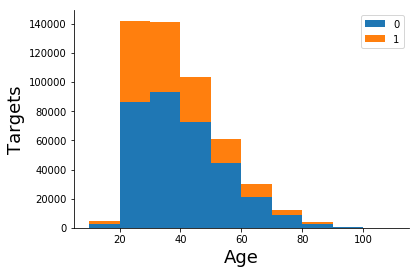

In [7]:
bins=np.arange(10, 120, 10)
hist1=train_data[train_data.target == 0].age
hist2=train_data[train_data.target == 1].age

n,b,p=plt.hist([hist1, hist2], stacked=True,range=[18,111],bins=bins)
plt.legend(['0','1'],loc=0)

plt.xlabel('Age', fontsize=18)
plt.ylabel('Targets', fontsize=18)
sns.despine()

From this plot we can identify the bins if I want to binn the age
and it shows the ages with small number of rows

C:\Users\ysami\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\Users\ysami\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ysami\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


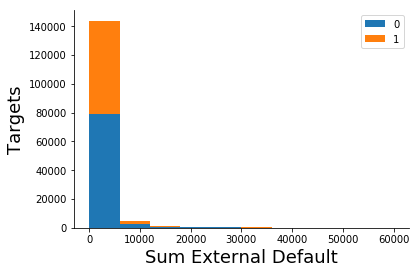

In [8]:
hist1=train_data[train_data.target == 0].sumExternalDefault 
hist2=train_data[train_data.target == 1].sumExternalDefault 

n,b,p=plt.hist([hist1, hist2], stacked=True,range=[1,60000])
plt.legend(['0','1'],loc=0)

plt.xlabel('Sum External Default', fontsize=18)
plt.ylabel('Targets', fontsize=18)

sns.despine()

In this plot we can see that the sum External default has a lot of outliers above >1000000 and the  number are too large maybe it is a good idea to be normalized

C:\Users\ysami\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\Users\ysami\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ysami\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


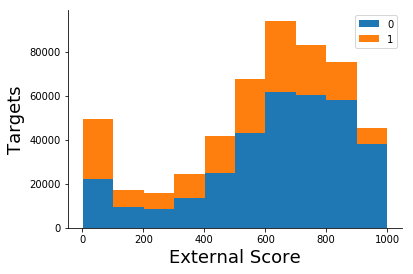

In [9]:
hist1=train_data[train_data.target == 0].externalScore 
hist2=train_data[train_data.target == 1].externalScore 

n,b,p=plt.hist([hist1, hist2], stacked=True,range=[1,1000])
plt.legend(['0','1'],loc=0)
plt.ylabel('Targets', fontsize=18)
plt.xlabel('External Score', fontsize=18)

sns.despine()

C:\Users\ysami\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\Users\ysami\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ysami\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


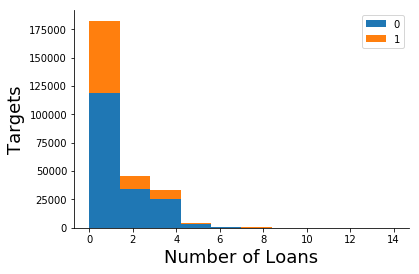

In [10]:
hist1=train_data[train_data.target == 0].numLoans
hist2=train_data[train_data.target == 1].numLoans

n,b,p=plt.hist([hist1, hist2], stacked=True,range=[0,14])
plt.legend(['0','1'],loc=0)
plt.ylabel('Targets', fontsize=18)
plt.xlabel('Number of Loans', fontsize=18)

sns.despine()

this plot shows the distribuation of number of loans and we can see that there is only few records above > 4 loans

C:\Users\ysami\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\Users\ysami\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ysami\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


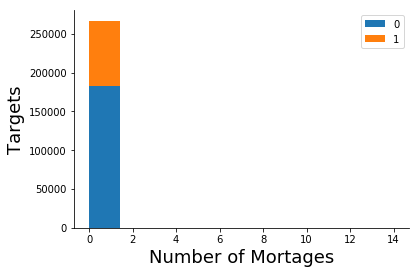

In [11]:
hist1=train_data[train_data.target == 0].numMortgages
hist2=train_data[train_data.target == 1].numMortgages

n,b,p=plt.hist([hist1, hist2], stacked=True,range=[0,14])
plt.legend(['0','1'],loc=0)
plt.ylabel('Targets', fontsize=18)
plt.xlabel('Number of Mortages', fontsize=18)

sns.despine()

In [12]:
train_data.groupby("numMortgages")["target"].agg( 'count')

numMortgages
0.0    254600
1.0     12476
2.0       252
3.0        10
Name: target, dtype: int64

the mortage distribuations shows that that most of the records have 0 or 1 mortatages

## Remove Discovered Outliers from Training

Removing Outliers from training data or sumExternalDefault >1000000

In [38]:
train_data=train_data[train_data['sumExternalDefault'] < 1000000]


In [14]:
train_data.isnull().sum()

customerID                 0
sex                        0
status                     0
age                    20022
externalScore           5634
indSimin                   0
indXlist                   0
indCreditBureau            0
indInternet                0
indBadDebt                 0
salary                     0
numLoans              252922
numMortgages          252922
channel                    0
indBadLocation             0
previous                   0
sumExternalDefault         0
target                     0
dtype: int64

## Factors Plots 

Plotting factors Vs Target

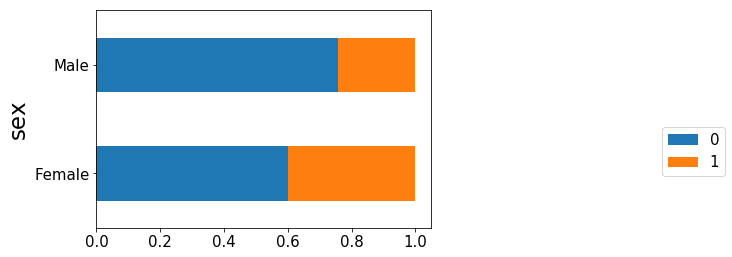

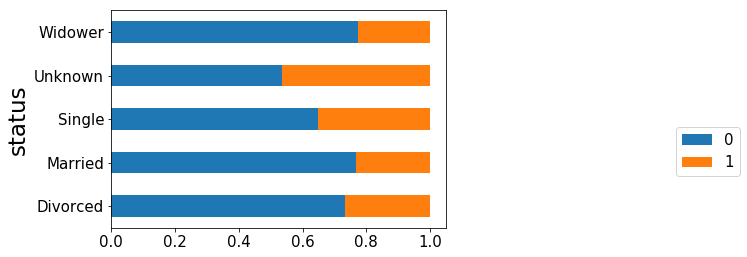

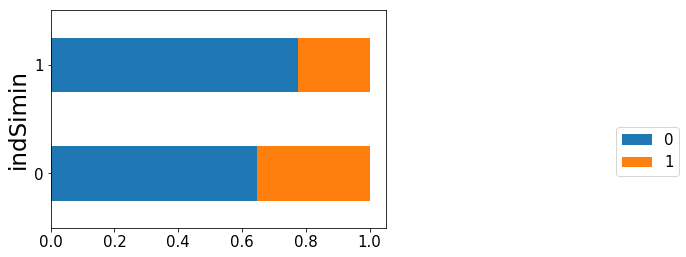

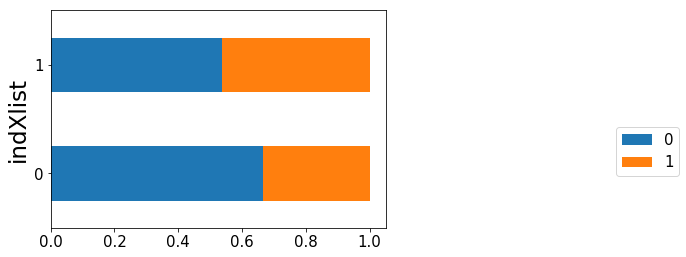

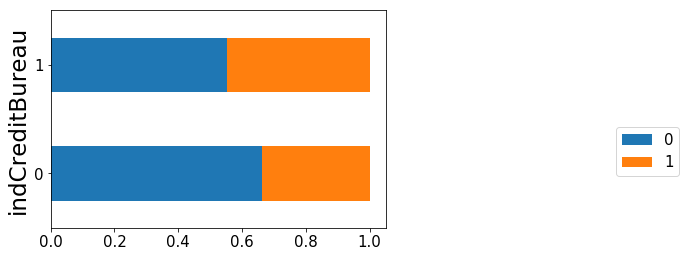

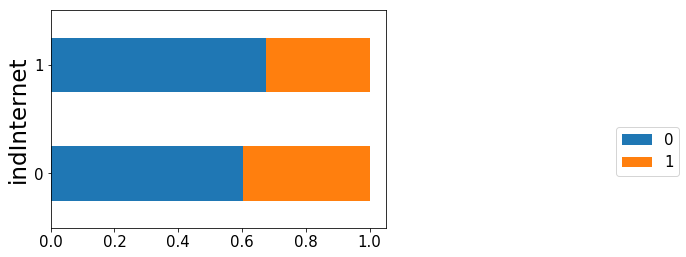

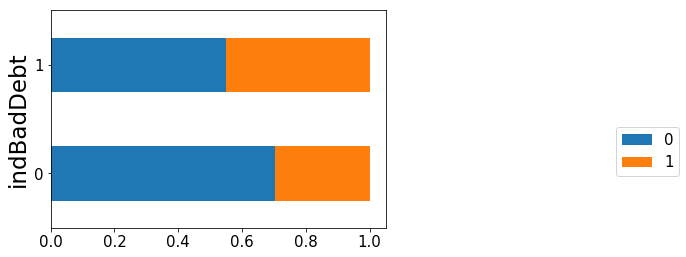

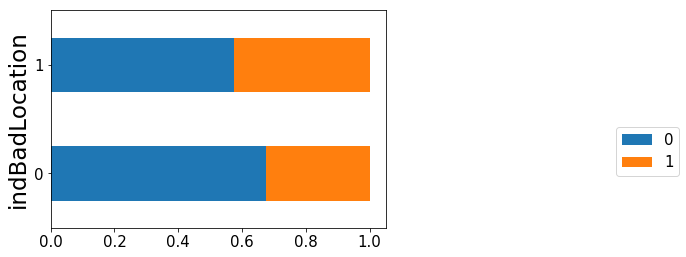

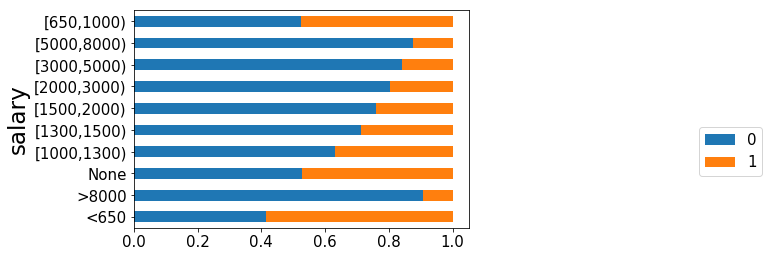

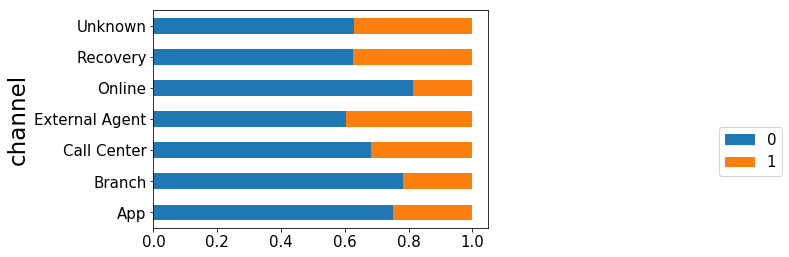

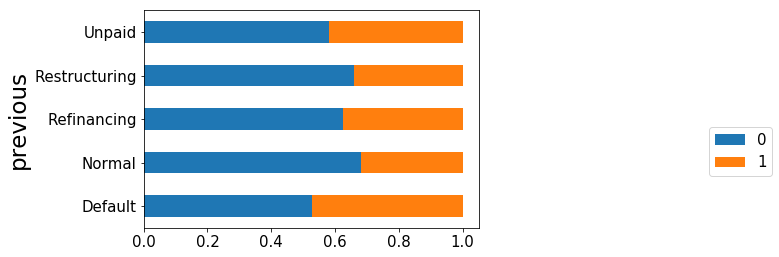

In [15]:


factorstoplot=['sex','status','indSimin','indXlist','indCreditBureau','indInternet','indBadDebt','indBadLocation','salary','channel', 'previous']
for i in range(1,len(factorstoplot)+1):
   
    thisFactor=factorstoplot[i-1]
    sumfactor=train_data.groupby([thisFactor]).target.count()
    temp=pd.DataFrame(train_data.groupby([thisFactor]).target.value_counts()/sumfactor)
    temp['t_type']=temp.index.get_level_values('target')
    temp['source']=temp.index.get_level_values(thisFactor)
    temp.columns=['n','t_type',thisFactor]
    temp=temp.pivot(index=thisFactor, columns='t_type', values='n')
    temp['tot']=temp.sum(axis=1)
    temp.sort_values(by='tot', ascending=True)[[0,1]].plot(kind='barh', stacked='True', color=sns.color_palette(), fontsize=15,legend=False)
    plt.legend( loc='upper right', bbox_to_anchor=(1.9, 0.5),fontsize=15)
    plt.ylabel(thisFactor, fontsize=23)

# Data Preprations

## Combining Train and test data

In [39]:
#Drop target column to combine the training and the test dataset for further data preperation
training_data=train_data.drop(['target'], axis=1)

In [136]:
#save the target values of the training in target_F
target_F=train_data.target

In [41]:
training_data.isnull().sum()

customerID                 0
sex                        0
status                     0
age                    20022
externalScore           5634
indSimin                   0
indXlist                   0
indCreditBureau            0
indInternet                0
indBadDebt                 0
salary                     0
numLoans              252922
numMortgages          252922
channel                    0
indBadLocation             0
previous                   0
sumExternalDefault         0
dtype: int64

In [57]:
combined_df=training_data.append(test)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694570 entries, 0 to 174312
Data columns (total 17 columns):
customerID            694570 non-null object
sex                   694570 non-null object
status                694570 non-null object
age                   667076 non-null float64
externalScore         686179 non-null float64
indSimin              694570 non-null int64
indXlist              694570 non-null int64
indCreditBureau       694570 non-null int64
indInternet           694570 non-null int64
indBadDebt            694570 non-null int64
salary                694570 non-null object
numLoans              356269 non-null float64
numMortgages          356269 non-null float64
channel               694570 non-null object
indBadLocation        694570 non-null int64
previous              694570 non-null object
sumExternalDefault    693695 non-null float64
dtypes: float64(5), int64(6), object(6)
memory usage: 95.4+ MB


### Normalizing Sum external default since it contains very too large numbers

In [58]:
combined_df.sumExternalDefault = combined_df.sumExternalDefault.apply(lambda x: np.log10(x+1))

### Check Nulls Combined Dataset

In [44]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694570 entries, 0 to 174312
Data columns (total 17 columns):
customerID            694570 non-null object
sex                   694570 non-null object
status                694570 non-null object
age                   667076 non-null float64
externalScore         686179 non-null float64
indSimin              694570 non-null int64
indXlist              694570 non-null int64
indCreditBureau       694570 non-null int64
indInternet           694570 non-null int64
indBadDebt            694570 non-null int64
salary                694570 non-null object
numLoans              356269 non-null float64
numMortgages          356269 non-null float64
channel               694570 non-null object
indBadLocation        694570 non-null int64
previous              694570 non-null object
sumExternalDefault    693695 non-null float64
dtypes: float64(5), int64(6), object(6)
memory usage: 95.4+ MB


In [22]:
combined_df.isnull().sum()

customerID                 0
sex                        0
status                     0
age                    27494
externalScore           8391
indSimin                   0
indXlist                   0
indCreditBureau            0
indInternet                0
indBadDebt                 0
salary                     0
numLoans              338301
numMortgages          338301
channel                    0
indBadLocation             0
previous                   0
sumExternalDefault       875
dtype: int64

### Check Nulls training_data and test data

In [23]:
training_data.isnull().sum()

customerID                 0
sex                        0
status                     0
age                    20022
externalScore           5634
indSimin                   0
indXlist                   0
indCreditBureau            0
indInternet                0
indBadDebt                 0
salary                     0
numLoans              252922
numMortgages          252922
channel                    0
indBadLocation             0
previous                   0
sumExternalDefault         0
dtype: int64

In [24]:
test.isnull().sum()

customerID                0
sex                       0
status                    0
age                    7472
externalScore          2757
indSimin                  0
indXlist                  0
indCreditBureau           0
indInternet               0
indBadDebt                0
salary                    0
numLoans              85379
numMortgages          85379
channel                   0
indBadLocation            0
previous                  0
sumExternalDefault      875
dtype: int64

### Check Columns Correlations

In [59]:
combined_df=combined_df.drop('customerID', 1)

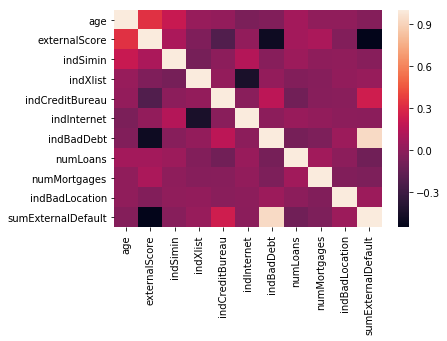

In [60]:
sns.heatmap(combined_df.corr())



In [61]:
combined_df['indBadDebt'].corr(combined_df['sumExternalDefault'])

0.9304046860918287

Obviously indbadDebt and Sum external default are strongly correlated and sumExternal default has nan in the test data so I will remove this column

In [62]:
combined_df=combined_df.drop('sumExternalDefault', 1)

# Null Imputation

### Loans and Mortages

Create new variables to have the null imputation of the loans and mortages.<br>
First by looking at the distribuation plots I decided to transform these value into categories as follows.<br>
Secondly leaving the numLoans and numMoratgaes column as they are while impute NA as -1 and test result using different features

In [63]:
combined_df["loans"]=combined_df["numLoans"]
combined_df["Mortgages"]=combined_df["numMortgages"]

In [64]:
combined_df.loc[combined_df.numLoans.isnull(),'loans']='Unknown'
combined_df.loc[combined_df.numLoans==0,'loans']='No Loans'
combined_df.loc[combined_df.numLoans==1,'loans']='1'
combined_df.loc[combined_df.numLoans==2,'loans']='2'
combined_df.loc[combined_df.numLoans==3,'loans']='3'
combined_df.loc[combined_df.numLoans==4,'loans']='4'
combined_df.loc[combined_df.numLoans>4,'loans']='>4'

In [65]:
combined_df.loc[combined_df.numMortgages.isnull(),'Mortgages']='Unknown'
combined_df.loc[combined_df.numMortgages==0,'Mortgages']='No Mortgages'
combined_df.loc[combined_df.numMortgages==1,'Mortgages']='1'
combined_df.loc[combined_df.numMortgages>1,'Mortgages']='>1'

combined_df.loc[combined_df["numLoans"].isnull(),'numLoans']=-1
combined_df.loc[combined_df["numMortgages"].isnull(),'numMortgages']=-1

In [53]:
combined_df['age_binned'] = pd.cut(combined_df['age'], [10, 20, 30,40,50,60,70,80,120], labels=['10-20', '20-30', '30-40','40-50','50-60','60-70','70-80','>80'])

In [66]:
combined_df.isnull().sum()

sex                     0
status                  0
age                 27494
externalScore        8391
indSimin                0
indXlist                0
indCreditBureau         0
indInternet             0
indBadDebt              0
salary                  0
numLoans           338301
numMortgages       338301
channel                 0
indBadLocation          0
previous                0
loans                   0
Mortgages               0
dtype: int64

### Encode  Categorical Variable

In [68]:
factorschange=[x for x in combined_df.columns if x in ['sex','status','channel','previous', 'salary','Mortgages','loans']]



for factor in factorschange:
    # names to numbers
    combined_df[factor] = preprocessing.LabelEncoder().fit_transform(combined_df[factor].astype(str))

In [69]:
combined_df= combined_df.drop(['numLoans','numMortgages'], axis = 1)

In [77]:
combined_df__knn = KNN(k=3).complete(combined_df)

# matrix completion using convex optimization to find low-rank solution
# that still matches observed values. Slow!
combined_df_nnm = NuclearNormMinimization().complete(combined_df)

# Instead of solving the nuclear norm objective directly, instead
# induce sparsity using singular value thresholding
combined_df_softimpute = SoftImpute().complete(combined_df)

combined_df_SVD = pd.DataFrame(IterativeSVD().complete(combined_df))

# print mean squared error for the three imputation methods above
nnm_mse = ((combined_df_nnm[missing_mask] - combined_df[missing_mask]) ** 2).mean()
print("Nuclear norm minimization MSE: %f" % nnm_mse)

softImpute_mse = ((combined_df_softimpute[missing_mask] - combined_df[missing_mask]) ** 2).mean()
print("SoftImpute MSE: %f" % softImpute_mse)

knn_mse = ((combined_df_knn[missing_mask] - combined_df[missing_mask]) ** 2).mean()
print("knnImpute MSE: %f" % knn_mse)

MemoryError: 

[IterativeSVD] Iter 1: observed MAE=1.618422


C:\Users\ysami\Anaconda3\lib\site-packages\fancyimpute\iterative_svd.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return (ssd / old_norm_squared) < self.convergence_threshold


[IterativeSVD] Iter 2: observed MAE=0.663036
[IterativeSVD] Iter 3: observed MAE=0.318733


### Impute null in ages 

Obviously external score has no effect on ages so i will remove it from the training set

Create a new column for predictions of age using imputation models

In [56]:
combined_df['predAge']=combined_df['age']

Create a feature dataset that has non null in age to use it for training

In [85]:
features=combined_df
#target = features['age']

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(['externalScore'], axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, random_state = 42)


In [89]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694570 entries, 0 to 174312
Data columns (total 14 columns):
sex                694570 non-null int64
status             694570 non-null int64
age                667076 non-null float64
indSimin           694570 non-null int64
indXlist           694570 non-null int64
indCreditBureau    694570 non-null int64
indInternet        694570 non-null int64
indBadDebt         694570 non-null int64
salary             694570 non-null int64
channel            694570 non-null int64
indBadLocation     694570 non-null int64
previous           694570 non-null int64
loans              694570 non-null int64
Mortgages          694570 non-null int64
dtypes: float64(1), int64(13)
memory usage: 79.5 MB


In [116]:
df = pd.DataFrame(pred_age_df_MICE)

In [117]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,2.0,23.000000,0.0,0.0,0.0,1.0,1.0,5.0,3.0,0.0,1.0,6.0,3.0
1,1.0,2.0,27.000000,1.0,0.0,0.0,1.0,0.0,7.0,3.0,0.0,3.0,0.0,2.0
2,1.0,2.0,28.000000,0.0,0.0,0.0,1.0,0.0,7.0,3.0,0.0,3.0,1.0,2.0
3,1.0,2.0,45.000000,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,4.0,0.0,2.0
4,0.0,3.0,27.643119,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,1.0,6.0,3.0
5,0.0,2.0,47.000000,0.0,0.0,0.0,0.0,1.0,7.0,3.0,0.0,2.0,6.0,3.0
6,0.0,1.0,52.000000,0.0,0.0,0.0,1.0,0.0,5.0,5.0,0.0,1.0,6.0,3.0
7,1.0,1.0,58.000000,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,4.0,1.0,2.0
8,0.0,1.0,45.000000,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,2.0,6.0,3.0
9,1.0,1.0,51.000000,0.0,0.0,0.0,1.0,0.0,7.0,5.0,0.0,3.0,0.0,2.0


In [112]:
pred_age_df_MICE=MICE().complete(features)
pred_age_df_softimpute = SoftImpute().complete(features)
pred_age_df_SVD = pd.DataFrame(IterativeSVD().complete(features))



[MICE] Completing matrix with shape (694570, 14)
[MICE] Starting imputation round 1/110, elapsed time 0.096
[MICE] Starting imputation round 2/110, elapsed time 0.276
[MICE] Starting imputation round 3/110, elapsed time 0.468
[MICE] Starting imputation round 4/110, elapsed time 0.645
[MICE] Starting imputation round 5/110, elapsed time 0.825
[MICE] Starting imputation round 6/110, elapsed time 1.005
[MICE] Starting imputation round 7/110, elapsed time 1.185
[MICE] Starting imputation round 8/110, elapsed time 1.368
[MICE] Starting imputation round 9/110, elapsed time 1.552
[MICE] Starting imputation round 10/110, elapsed time 1.731
[MICE] Starting imputation round 11/110, elapsed time 1.912
[MICE] Starting imputation round 12/110, elapsed time 2.103
[MICE] Starting imputation round 13/110, elapsed time 2.295
[MICE] Starting imputation round 14/110, elapsed time 2.480
[MICE] Starting imputation round 15/110, elapsed time 2.673
[MICE] Starting imputation round 16/110, elapsed time 2.858


C:\Users\ysami\Anaconda3\lib\site-packages\fancyimpute\soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


[SoftImpute] Iter 2: observed MAE=0.435112 rank=5
[SoftImpute] Iter 3: observed MAE=0.435111 rank=5
[SoftImpute] Iter 4: observed MAE=0.435109 rank=5
[SoftImpute] Iter 5: observed MAE=0.435108 rank=5
[SoftImpute] Iter 6: observed MAE=0.435106 rank=5
[SoftImpute] Iter 7: observed MAE=0.435103 rank=5
[SoftImpute] Iter 8: observed MAE=0.435102 rank=5
[SoftImpute] Iter 9: observed MAE=0.435100 rank=5
[SoftImpute] Iter 10: observed MAE=0.435098 rank=5
[SoftImpute] Iter 11: observed MAE=0.435097 rank=5
[SoftImpute] Iter 12: observed MAE=0.435096 rank=5
[SoftImpute] Iter 13: observed MAE=0.435095 rank=5
[SoftImpute] Iter 14: observed MAE=0.435093 rank=5
[SoftImpute] Iter 15: observed MAE=0.435092 rank=5
[SoftImpute] Iter 16: observed MAE=0.435090 rank=5
[SoftImpute] Iter 17: observed MAE=0.435089 rank=5
[SoftImpute] Iter 18: observed MAE=0.435089 rank=5
[SoftImpute] Iter 19: observed MAE=0.435088 rank=5
[SoftImpute] Iter 20: observed MAE=0.435088 rank=5
[SoftImpute] Iter 21: observed MAE=0.43

C:\Users\ysami\Anaconda3\lib\site-packages\fancyimpute\iterative_svd.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return (ssd / old_norm_squared) < self.convergence_threshold


[IterativeSVD] Iter 2: observed MAE=0.516565
[IterativeSVD] Iter 3: observed MAE=0.271681
[IterativeSVD] Iter 4: observed MAE=0.110462


In [118]:
pred_age_df_MICE = pd.DataFrame(pred_age_df_MICE)

In [120]:
pred_age_df_MICE[2]

0         23.000000
1         27.000000
2         28.000000
3         45.000000
4         27.643119
5         47.000000
6         52.000000
7         58.000000
8         45.000000
9         51.000000
10        56.000000
11        65.000000
12        59.000000
13        62.000000
14        46.000000
15        69.000000
16        47.000000
17        27.000000
18        36.000000
19        43.000000
20        51.000000
21        28.000000
22        37.000000
23        43.000000
24        53.000000
25        38.000000
26        29.000000
27        39.000000
28        25.000000
29        21.000000
            ...    
694540    61.000000
694541    45.000000
694542    27.000000
694543    42.000000
694544    30.000000
694545    20.000000
694546    48.000000
694547    40.000000
694548    31.010718
694549    22.881829
694550    25.000000
694551    63.000000
694552    23.000000
694553    25.000000
694554    29.000000
694555    24.000000
694556    49.000000
694557    28.000000
694558    35.000000


In [122]:
MICE_mse = ((pred_age_df_MICE[2] - features['age']) ** 2).mean()
print("MICE MSE: %f" % MICE_mse)



MICE MSE: 385.138069


The lowest mean absolute value is from the iterative SVD then we will use it as the age imputed value

In [124]:
combined_df['age']=pred_age_df_SVD[2]

In [127]:
combined_df.isnull().sum()

sex                   0
status                0
age                   0
externalScore      8391
indSimin              0
indXlist              0
indCreditBureau       0
indInternet           0
indBadDebt            0
salary                0
channel               0
indBadLocation        0
previous              0
loans                 0
Mortgages             0
dtype: int64

### External Score Emputation

In [128]:
features=combined_df
pred_age_df_MICE=MICE().complete(features)
pred_age_df_softimpute = SoftImpute().complete(features)
pred_age_df_SVD = pd.DataFrame(IterativeSVD().complete(features))

[MICE] Completing matrix with shape (694570, 15)
[MICE] Starting imputation round 1/110, elapsed time 0.102
[MICE] Starting imputation round 2/110, elapsed time 0.304
[MICE] Starting imputation round 3/110, elapsed time 0.498
[MICE] Starting imputation round 4/110, elapsed time 0.686
[MICE] Starting imputation round 5/110, elapsed time 0.887
[MICE] Starting imputation round 6/110, elapsed time 1.076
[MICE] Starting imputation round 7/110, elapsed time 1.268
[MICE] Starting imputation round 8/110, elapsed time 1.456
[MICE] Starting imputation round 9/110, elapsed time 1.649
[MICE] Starting imputation round 10/110, elapsed time 1.854
[MICE] Starting imputation round 11/110, elapsed time 2.057
[MICE] Starting imputation round 12/110, elapsed time 2.304
[MICE] Starting imputation round 13/110, elapsed time 2.526
[MICE] Starting imputation round 14/110, elapsed time 2.731
[MICE] Starting imputation round 15/110, elapsed time 2.941
[MICE] Starting imputation round 16/110, elapsed time 3.148


C:\Users\ysami\Anaconda3\lib\site-packages\fancyimpute\soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


[SoftImpute] Iter 2: observed MAE=2.087059 rank=2
[SoftImpute] Iter 3: observed MAE=2.087064 rank=2
[SoftImpute] Iter 4: observed MAE=2.087069 rank=2
[SoftImpute] Iter 5: observed MAE=2.087073 rank=2
[SoftImpute] Iter 6: observed MAE=2.087078 rank=2
[SoftImpute] Iter 7: observed MAE=2.087082 rank=2
[SoftImpute] Iter 8: observed MAE=2.087086 rank=2
[SoftImpute] Iter 9: observed MAE=2.087090 rank=2
[SoftImpute] Iter 10: observed MAE=2.087094 rank=2
[SoftImpute] Iter 11: observed MAE=2.087097 rank=2
[SoftImpute] Iter 12: observed MAE=2.087101 rank=2
[SoftImpute] Iter 13: observed MAE=2.087105 rank=2
[SoftImpute] Iter 14: observed MAE=2.087109 rank=2
[SoftImpute] Iter 15: observed MAE=2.087113 rank=2
[SoftImpute] Iter 16: observed MAE=2.087117 rank=2
[SoftImpute] Iter 17: observed MAE=2.087120 rank=2
[SoftImpute] Iter 18: observed MAE=2.087123 rank=2
[SoftImpute] Iter 19: observed MAE=2.087127 rank=2
[SoftImpute] Iter 20: observed MAE=2.087130 rank=2
[SoftImpute] Iter 21: observed MAE=2.08

C:\Users\ysami\Anaconda3\lib\site-packages\fancyimpute\iterative_svd.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return (ssd / old_norm_squared) < self.convergence_threshold


[IterativeSVD] Iter 2: observed MAE=0.639932
[IterativeSVD] Iter 3: observed MAE=0.314119


The lowest mean absolute value is from the iterative SVD then we will use it as the age imputed value

In [129]:
combined_df['externalScore']=pred_age_df_SVD[3]

In [130]:
combined_df.isnull().sum()

sex                0
status             0
age                0
externalScore      0
indSimin           0
indXlist           0
indCreditBureau    0
indInternet        0
indBadDebt         0
salary             0
channel            0
indBadLocation     0
previous           0
loans              0
Mortgages          0
dtype: int64

# Re-split data into Training and Testing

In [131]:
training_set=combined_df[:len(training_data)]

In [132]:
test_set=combined_df[len(test):]

In [133]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520257 entries, 0 to 522938
Data columns (total 15 columns):
sex                520257 non-null int64
status             520257 non-null int64
age                520257 non-null float64
externalScore      520257 non-null float64
indSimin           520257 non-null int64
indXlist           520257 non-null int64
indCreditBureau    520257 non-null int64
indInternet        520257 non-null int64
indBadDebt         520257 non-null int64
salary             520257 non-null int64
channel            520257 non-null int64
indBadLocation     520257 non-null int64
previous           520257 non-null int64
loans              520257 non-null int64
Mortgages          520257 non-null int64
dtypes: float64(2), int64(13)
memory usage: 63.5 MB


In [134]:
training_set.head()

,sex,status,age,externalScore,indSimin,indXlist,indCreditBureau,indInternet,indBadDebt,salary,channel,indBadLocation,previous,loans,Mortgages
0,0,2,23.000000,373.0,0,0,0,1,1,5,3,0,1,6,3
1,1,2,27.000000,702.0,1,0,0,1,0,7,3,0,3,0,2
2,1,2,28.000000,728.0,0,0,0,1,0,7,3,0,3,1,2
3,1,2,45.000000,650.0,0,0,0,0,0,5,2,0,4,0,2
4,0,3,1.221704,625.0,0,0,0,1,0,2,3,0,1,6,3


## Features Selection 

In [140]:
# use these variables - room for improvement here
   
#factors=[u'sex',u'status',u'salary',u'previous', 'age','predScore','indSimin','indXlist','indCreditBureau',
 #       'indInternet','indBadDebt',u'channel','indBadLocation','sumExternalDefault','loans','Mortgages']

factors=[u'sex',u'status',u'salary',u'previous', 'age','externalScore','indSimin','indXlist','indCreditBureau',
        'indInternet','indBadDebt',u'channel','indBadLocation','loans','Mortgages']

X_train, X_test, y_train, y_test = train_test_split(training_set[factors], target_F, test_size=0.1, random_state=10)


print (len(X_train), len(X_test))

468231 52026


In [141]:
X_test=(X_test - X_test.min())/(X_test.max() - X_test.min())
X_train=(X_train - X_train.min())/(X_train.max() - X_train.min())

### Standarize the scalling of the dataset to enhance prediction 

In [142]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### Running Different Models and test the accuracy results to pick the best model

In [69]:
modelLR = LogisticRegression(random_state=0)
modelLR.fit(X_train, y_train)
scoreLR= modelLR.score(X_test,y_test)
print ('Logistic Regression Accuracy', scoreLR)

Logistic Regression Accuracy 0.6841163220979809


In [53]:
y_pred = modelLR.predict_proba(X_test)[:, 1]
auc_scoreLR=roc_auc_score(y_test,y_pred)
print ('Logistic Regression auc', auc_scoreLR)

Logistic Regression auc 0.6768719838128437


In [54]:
modelETC = ExtraTreesClassifier(n_estimators=1000,min_samples_split=10)
modelETC.fit(X_train, y_train)
scoreETC= modelETC.score(X_test,y_test)
print ('Extra Tree Classifier', scoreETC)

KeyboardInterrupt: 

In [ ]:
y_pred = modelETC.predict_proba(X_test)[:, 1]
auc_scoreETC=roc_auc_score(y_test,y_pred)
print ('Extra Tree Classifier auc', auc_scoreETC)

In [ ]:
modelRFC = RandomForestClassifier(n_estimators=1000,min_samples_split=5,bootstrap=True)
modelRFC.fit(X_train, y_train)
scoreRFC= modelRFC.score(X_test,y_test)
print ('Random Forest Classifier', scoreRFC)

In [ ]:
y_pred = modelRFC.predict_proba(X_test)[:, 1]
auc_scoreRFC=roc_auc_score(y_test,y_pred)
print ('Random Forest Classifier auc', auc_scoreRFC)

In [143]:
modelXclass = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)   
modelXclass.fit(X_train, y_train)  
scoreXclass= modelXclass.score(X_test,y_test)
print ('XGboost Classifiers', scoreXclass)

XGboost Classifiers 0.6908661054088341


C:\Users\ysami\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [144]:
y_pred = modelXclass.predict_proba(X_test)[:, 1]
auc_scoreXclass=roc_auc_score(y_test,y_pred)
print ('XGboost Classifiers auc', auc_scoreXclass)

XGboost Classifiers auc 0.6976951044369528


In [ ]:
pd.DataFrame([
    ('LR' ,auc_scoreLR),
    ('ETC', auc_scoreETC),
    ('RFC', auc_scoreRFC),
    ('XGB', auc_scoreXclass),
    ], columns=["Network", "score"]).plot(x="Network", y="score", kind="Bar", fontsize=15)
plt.xlabel('Network', fontsize=15)
plt.ylabel('Score', fontsize=15)

In [145]:
modelXclass.fit(X_train, y_train, \
        eval_set=[(X_train, y_train), (X_test, y_test)], \
                  eval_metric='auc', early_stopping_rounds = 50)

[0]	validation_0-auc:0.6703	validation_1-auc:0.665709
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.678373	validation_1-auc:0.674201
[2]	validation_0-auc:0.679385	validation_1-auc:0.67523
[3]	validation_0-auc:0.681052	validation_1-auc:0.676708
[4]	validation_0-auc:0.68457	validation_1-auc:0.680469
[5]	validation_0-auc:0.685975	validation_1-auc:0.681677
[6]	validation_0-auc:0.688385	validation_1-auc:0.683794
[7]	validation_0-auc:0.688686	validation_1-auc:0.684068
[8]	validation_0-auc:0.690755	validation_1-auc:0.685647
[9]	validation_0-auc:0.69152	validation_1-auc:0.686323
[10]	validation_0-auc:0.691789	validation_1-auc:0.686678
[11]	validation_0-auc:0.692205	validation_1-auc:0.686963
[12]	validation_0-auc:0.692983	validation_1-auc:0.687777
[13]	validation_0-auc:0.69383	validation_1-auc:0.688372
[14]	validation_0-auc:0.694453	validation_1-auc:0.688947
[15]

[142]	validation_0-auc:0.709134	validation_1-auc:0.700215
[143]	validation_0-auc:0.709154	validation_1-auc:0.700222
[144]	validation_0-auc:0.709191	validation_1-auc:0.700222
[145]	validation_0-auc:0.709229	validation_1-auc:0.700244
[146]	validation_0-auc:0.70926	validation_1-auc:0.700246
[147]	validation_0-auc:0.70927	validation_1-auc:0.700241
[148]	validation_0-auc:0.709345	validation_1-auc:0.700313
[149]	validation_0-auc:0.709386	validation_1-auc:0.700337
[150]	validation_0-auc:0.709434	validation_1-auc:0.700354
[151]	validation_0-auc:0.709471	validation_1-auc:0.700347
[152]	validation_0-auc:0.709493	validation_1-auc:0.700328
[153]	validation_0-auc:0.709516	validation_1-auc:0.70034
[154]	validation_0-auc:0.709538	validation_1-auc:0.700334
[155]	validation_0-auc:0.709567	validation_1-auc:0.700349
[156]	validation_0-auc:0.709602	validation_1-auc:0.700334
[157]	validation_0-auc:0.709639	validation_1-auc:0.70034
[158]	validation_0-auc:0.709662	validation_1-auc:0.700345
[159]	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [73]:
modelXclass_f=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [74]:
modelXclass_f.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [75]:
y_pred = modelXclass_f.predict_proba(X_test)[:, 1]
roc_auc_score(y_test,y_pred)

0.7130095412293418

In [79]:
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.4f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.4f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

NameError: name 'itertools' is not defined

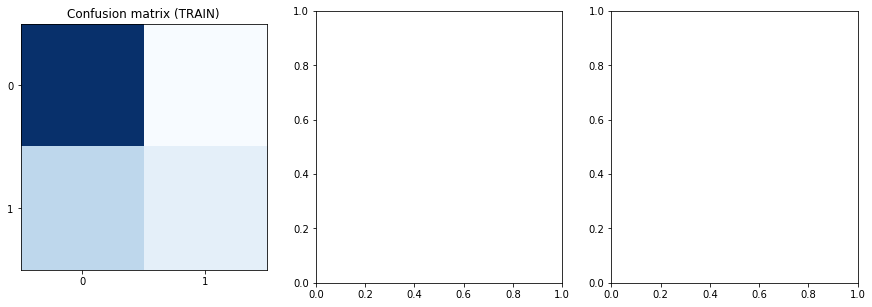

In [80]:
threshold = 0.5
train_pred = modelXclass_f.predict_proba(X_train)[:,1]
test_pred = modelXclass_f.predict_proba(X_test)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, train_pred, y_test, test_pred, threshold)
    
plt.tight_layout()
plt.show()

In [76]:
from sklearn.metrics import confusion_matrix
labels=['functional','functional needs repair','non functional']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

threshold=0.5
# Compute confusion matrix
cm = confusion_matrix(y_test, modelXclass_f.predict_proba(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plot_auc( y_train, y_train_pred, y_test, y_test_pred, threshold)

plt.show()
print ('Test Score', cm.diagonal().sum()/float(cm.sum()))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets